In [336]:
import numpy as np # linear algebra
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [644]:
df = pd.read_csv('whole_df.csv')

In [645]:
concated = df

In [646]:
import nltk
import re
from itertools import chain

all_rows = [re.sub('[()&;,:!<>/#~-]', '', row.lower()) for row in concated[concated.type == 'clothing'].name]
allWords = [row.split(' ') for row in all_rows]
allWordDist = nltk.FreqDist(w.lower() for w in list(chain(*allWords)))
stopwords = nltk.corpus.stopwords.words('english')
#stopwords.extend(['in', 'on', 'with', 'for', 'by', 'to', 'and', 'the', 'm', 'us'])
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWordDist if w not in stopwords)    

In [647]:
freq = [i[0] for i in allWordExceptStopDist.most_common(5000)]

In [780]:
from itertools import chain

color = 'Red, Orange, Yellow, Green, Blue, Purple, Brown, Silver, Violet, Pink, Black, White, Gray, Grey'.lower().split(', ')
size = ['large', 'medium', 'small', 'tiny', 'xxl', 'xl', 'xxxl']

gender = ['men', 'women', 'boys', 'girls', 'girl', 'boy', 'lady']
clothing_noun = ['shirt', 'tshirt', 'pants', 'sweatshirt', 'sock','socks','visor','hat',
                 't-shirt', 'top', 'pajamas', 'pajama', 'miniskirt',
                 'jacket', 'leggings', 'legging', 'underwear',
                 'costume', 'cardigan', 'blouse', 'beret', 'shorts', 'bibbikini',
                 'sock', 'sweater', 'suit', 'stockings', 'sweatshirt', 'trousers',
                 'uniform', 'gown', 'clothing', 'belt', 'bonnet', 'tie', 'blazer',
                 'dress', 'attire', 'apron', 'bra', 'jeans', 'raincoat', 'lingerie',
                 'shorts']

exclude = [i for i in chain(color, size, gender, clothing_noun)]
clothing_style = [i for i in freq if i not in exclude]

In [761]:
clothing_style[:10]

['sequin',
 'dancer',
 'tutu',
 'ballet',
 'dance',
 'fairy',
 'princess',
 'accessory',
 'dressup',
 'shining']

Genism word2vec requires that a format of ‘list of lists’ for training where every document is contained in a list and every list contains lists of tokens of that document. At first, we need to generate a format of ‘list of lists’ for training the make model word embedding. To be more specific, each make model is contained in a list and every list contains lists of features of that make model.

In [762]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = allWords
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]

[['purple',
  'sequin',
  'tiny',
  'dancer',
  'tutu',
  'ballet',
  'dance',
  'fairy',
  'princess',
  'costume',
  'accessory'],
 ['ballet', 'dressup', 'fairy', 'tutu']]

In [811]:
# skip gram
model = Word2Vec(sent, min_count=1, size= 50, workers=3, window = 3, sg = 1)

model.most_similar('red')[:4]

[('blue', 0.9806678295135498),
 ('green', 0.9803977012634277),
 ('dark', 0.9687007069587708),
 ('pink', 0.961593508720398)]

In [ ]:
# Create CBOW model 
#model = gensim.models.Word2Vec(sent, min_count = 1,  
                            #  size = 50, window = 5) 


In [767]:
def cosine_distance (model, word, target_list) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    b = sum([model[item] for item in target_list])/len(target_list)
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)* np.linalg.norm(b))
    return cos_sim
cosine_distance (model, 'dress', color)

0.72772837

In [768]:
cosine_distance (model, 'red', color)

0.9689934

In [792]:
all_rows[0]

'purple sequin tiny dancer tutu ballet dance fairy princess costume accessory'

In [770]:
for i in all_rows[0].split(' '):
    print(cosine_distance(model, i, color))

0.97770584
0.897861
0.81190807
0.91421586
0.8862196
0.78072214
0.9319234
0.8480487
0.6816776
0.6814914
0.7525961


In [771]:
for i in all_rows[0].split(' '):
    print(cosine_distance(model, i, clothing_style))

0.9040055
0.9827376
0.9553812
0.9873992
0.9885574
0.90277046
0.96923584
0.86395603
0.72729653
0.6829464
0.7387343


In [772]:
for i in all_rows[0].split(' '):
    print(cosine_distance(model, i, size))

0.95910066
0.907277
0.8652273
0.93854064
0.9140771
0.85864556
0.96216244
0.8887504
0.7295763
0.70556265
0.7638474


In [773]:
for i in all_rows[0].split(' '):
    print(cosine_distance(model, i, gender))

0.87507886
0.87139666
0.8753876
0.9242217
0.90330464
0.91521734
0.94049984
0.9395884
0.85723203
0.8577483
0.8251869


In [774]:
# get the words related with color for each product
def get_traits(model, row, target_list):
    word_list = []
    cosine_dict = {}
    for i in row.split(' '):
        a = model[i]
        b = sum([model[item] for item in target_list])/len(target_list)
        cos_sim = np.dot(a, b)/(np.linalg.norm(a)* np.linalg.norm(b))
        cosine_dict[i] = cos_sim
        dist_sort = sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    if dist_sort[0][1] > 0.93:
        return dist_sort[0][0]
    else:
        return 'Null'

# test some samples

In [775]:
print('The item is:  ', all_rows[0])
print('The color detected will be:  ', get_traits(model, all_rows[0], color))

The item is:   purple sequin tiny dancer tutu ballet dance fairy princess costume accessory
The color detected will be:   purple


In [781]:
print('The item is:  ', all_rows[78])
print('The size detected will be:  ', get_traits(model, all_rows[78], size))

The item is:   tommy bahama brushed palms linen camp shirt color light straw size xl
The size detected will be:   xl


In [777]:
print('The item is:  ', all_rows[9])
print('The color detected will be:  ', get_traits(model, all_rows[9], color))

The item is:   quoti love yaoiquot lucky bag black
The color detected will be:   black


In [778]:
print('The item is:  ', all_rows[90])
print('The style detected will be:  ', get_traits(model, all_rows[90], clothing_style))

The item is:   new cute sexy korean school girl uniform cosplay costume 4 size
The style detected will be:   cosplay


In [784]:
print('The item is:  ', all_rows[47])
print('The style detected will be:  ', get_traits(model, all_rows[47], size))

The item is:   sponge bob school backpack  large size  folded arm
The style detected will be:   large


In [564]:
def get_trait_df(all_rows_name, model2, color, gender, size, style):
    color_word = []
    size_word = []
    gender_word =[]
    style_word = []
    for i in all_rows_name:
        color_word.append(get_traits(model2, i, color))
        size_word.append(get_traits(model2, i, size))
        gender_word.append(get_traits(model2, i, gender))
        style_word.append(get_traits(model2, i, style))
    df = pd.DataFrame({'name': all_rows_name, 'color_word': color_word, 
              'size_word': size_word, 'gender_word': gender_word,
              'style_word':style_word})
    return df

In [790]:
from random import sample 
df = get_trait_df(sample(all_rows, 200), model, color, gender, size, clothing_style)
df.head(100)

,name,color_word,size_word,gender_word,style_word
0,neatnix jewelry stax 3 compartment organizer t...,burgundy,Null,Null,compartment
1,hard rockin witch wig,Null,Null,Null,rockin
2,ncaa texas hoodie with tackle twill logo mediu...,black,medium,Null,texas
3,kipling sausalito,Null,Null,Null,kipling
4,fbi female body inspector heavy cotton tshirt...,Null,Null,female,41
5,costume wig fun blue,blue,Null,fun,fun
6,redington versipant 30 inseam driftwood xl,Null,xl,Null,redington
7,duster coat mustard with contrasting brown col...,duster,xl,Null,contrasting
8,tyr transition backpack 2009,Null,Null,Null,transition
9,lsu hoodie with screen print logo medium,screen,medium,Null,lsu


In [794]:
df.to_csv('get_traits_on_amazon_data.csv')

# Test on the given Data

In [795]:
names = pd.read_csv('ecommerce_product_names.csv')

In [796]:
import re
from itertools import chain

all_rows_name = [re.sub('[()&;,:!<>/#~-]', '', row.lower()) for row in names['Product Name']]
allWords = [row.split(' ') for row in all_rows_name]


allWordDist = nltk.FreqDist(w.lower() for w in list(chain(*allWords)))
stopwords = nltk.corpus.stopwords.words('english')
#stopwords.extend(['in', 'on', 'with', 'for', 'by', 'to', 'and', 'the', 'm', 'us'])
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWordDist if w not in stopwords)    

In [797]:
freq = [i[0] for i in allWordExceptStopDist.most_common(1000)]

In [798]:
freq[:10]

['alisha',
 'solid',
 "women's",
 'cycling',
 'shorts',
 'fabhomedecor',
 'fabric',
 'double',
 'sofa',
 'bed']

In [799]:
color = 'Red, Orange, Yellow, Green, Blue, Purple, Brown, Silver, Violet, Pink, Black, White, Gray, Grey'.lower().split(', ')
size = ['large', 'medium', 'small', 'tiny', 'xxl', 'xl', 'xxxl',  '38', '4.5', '14k']

gender = ['men', 'women', 'boys', 'men\'s', 'women\'s', 'girls','ladies']
clothing_noun = ['shirt', 'tshirt', 'pants', 'sweatshirt', 'sock','socks','visor','hat',
                 't-shirt', 'top', 'pajamas', 'pajama', 'miniskirt',
                 'jacket', 'leggings', 'legging', 'underwear',
                 'costume', 'cardigan', 'blouse', 'beret', 'shorts', 'bibbikini',
                 'sock', 'sweater', 'suit', 'stockings', 'sweatshirt', 'trousers',
                 'uniform', 'gown', 'clothing', 'belt', 'bonnet', 'tie', 'blazer',
                 'dress', 'attire', 'apron', 'bra', 'jeans', 'raincoat', 'lingerie',
                 'shorts']


accesory = ['sunglasses', 'watch', 'socks', 'tie', 'ipad', 
            'bow tie', 'purse', 'gloves', 'scarf', 'umbrella',
            'earmuffs', 'hair band', 'handbag', 'mittens', 'cuff links', 
            'shirt studs' , 'tie clips', 'handkerchief', 'keyrings', 'keychains',
           'wallets', 'cap', 'hat']

# https://en.wikipedia.org/wiki/Cosmetics
beauty = ['makeup', 'concealer', 'cosmetics', 'primer', 'foundation', 
         'powder', 'bronzer', 'eyeshadow', 'lip balm', 'balm', 'eyeliner',
         'mascara', 'blush', 'lipstick', 'lip gloss', 'rouge', 
           'blusher', 'highlight', 'nail polish', 'spray', 'contouring',
          'eyebrow', 'cleanser', 'cleansing oil', 'toners', 'facial mask',
          'moisturizers', 'lotion', 'shampoo', 'bodycream', 'skin care', 'soap']


# https://www.wikiwand.com/en/List_of_jewellery_types
jewelry = ['crown', 'coronet', 'corolla', 'tiara', 'earring', 
           'hairpin', 'hatpin', 'bracelet', 'brooch', 'ring', 'necklace',
           'anklet', 'armlet', 'bangle', 'choker',  'fascinator', 'jewellery']

shoes = ['heels', 'sandals', 'slippers', 'flip-flops', 'loafers', 
        'boots', 'sneakers', 'trainers', 'ballerina', 'saddle', 'mule']



exclude = [i for i in chain(color, size, gender, clothing_noun, shoes, jewelry, beauty, accesory)]
style = [i for i in freq if i not in exclude]

In [800]:
# skip gram
model2 = Word2Vec(allWords, min_count=1, size= 50, workers=3, window = 3, sg = 1)

In [801]:
def get_trait_df(all_rows_name, model2, color, gender, size, style):
    color_word = []
    size_word = []
    gender_word =[]
    style_word = []
    for i in all_rows_name:
        color_word.append(get_traits(model2, i, color))
        size_word.append(get_traits(model2, i, size))
        gender_word.append(get_traits(model2, i, gender))
        style_word.append(get_traits(model2, i, style))
    df = pd.DataFrame({'name': all_rows_name, 'color_word': color_word, 
              'size_word': size_word, 'gender_word': gender_word,
              'style_word':style_word})
    return df

In [804]:
df = get_trait_df(all_rows_name[:100], model2, color, gender, size, style)
#df.head(100)

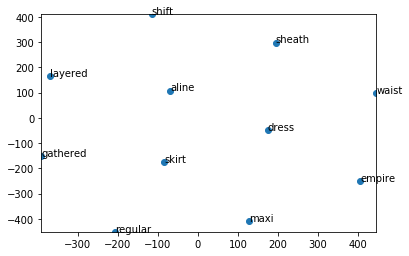

In [805]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
    
display_closestwords_tsnescatterplot(model2, 'dress', 50) 

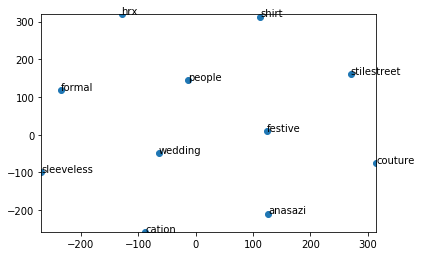

In [806]:
display_closestwords_tsnescatterplot(model2, 'shirt', 50) 

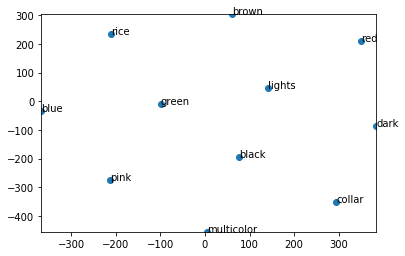

In [807]:
display_closestwords_tsnescatterplot(model2, 'red', 50) 

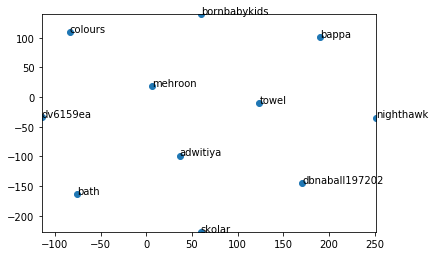

In [808]:
display_closestwords_tsnescatterplot(model2, 'towel', 50) 

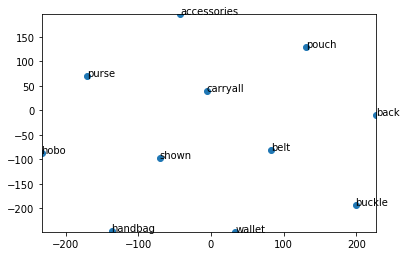

In [809]:
display_closestwords_tsnescatterplot(model, 'belt', 50) 